# 11. 불확실성 추정

- 어떤 테스트 포인트에 대해 분류기가 예측한 클래스가 무엇인지 뿐만 아니라 정확한 클래스임을 얼마나 확신하느지가 중요하다.
- scikit-learn 분류기에서 불확실성을 추정할 수 있는 함수가 2개 있다.

1) decision_function

2) predict_proba

이다.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

# 필요한 패키지와 라이브러리를 가져옴
plt.rcParams["font.family"] = 'AppleGothic'
%matplotlib inline

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예지를 위해 클래스 이름을 'blue', 'red'로 바꾼다.
y_named = np.array(['blue', 'red'])[y]

In [5]:
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

## 1. 결정 함수

In [6]:
print("X shape: {}".format(X_test.shape))
print("결정 함수 결과 형태: {}".format(gbrt.decision_function(X_test).shape))
print("결정 함수: \n{}".format(gbrt.decision_function(X_test)[:6]))

X shape: (25, 2)
결정 함수 결과 형태: (25,)
결정 함수: 
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [7]:
print("임계치와 결정 함수 결과 비교:\n{}".format(gbrt.decision_function(X_test) > 0))
print("예측:\n{}".format(gbrt.predict(X_test)))

임계치와 결정 함수 결과 비교:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [8]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
print("pred는 예측 결과와 같다: {}".format(np.all(pred == gbrt.predict(X_test))))

pred는 예측 결과와 같다: True


In [9]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최소값: {:.2f} 최대값: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

결정 함수 최소값: -7.69 최대값: 4.29


- decision function의 출력 범위가 임의의 값이라 이해하기 어렵다.

## 2. 예측 확률

- 예측 확률 값은 decision_function 출력보다 이해하기 쉽다.

In [11]:
print("확률 값의 형태: {}".format(gbrt.predict_proba(X_test).shape))

확률 값의 형태: (25, 2)


In [12]:
print("예측 확률: \n{}".format(gbrt.predict_proba(X_test[:6])))

예측 확률: 
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


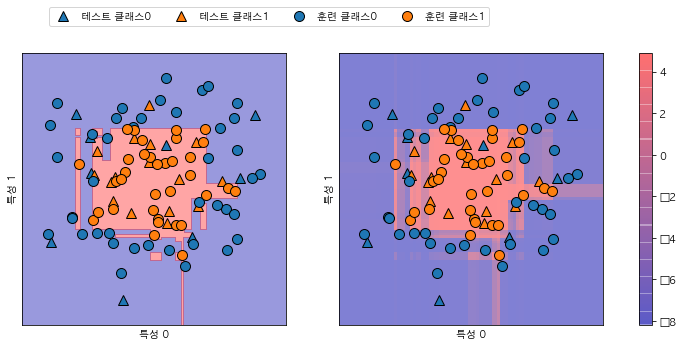

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=0.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=0.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 훈련 포인트 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[: , 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
cbar = plt.colorbar(score_image, ax=axes.tolist())
axes[0].legend(["테스트 클래스0", "테스트 클래스1", "훈련 클래스0", "훈련 클래스1"], ncol=4, loc=(.1, 1.1))

In [21]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print("결정 함수 결과 형태: {}".format(gbrt.decision_function(X_test).shape))
print("결정 함수 결과: \n{}".format(gbrt.decision_function(X_test)[:6, :]))
print("예측 확률: \n{}".format(gbrt.predict_proba(X_test)[:6, :]))
print("가장 큰 예측 확률 인덱스: \n{}".format(np.argmax(gbrt.predict_proba(X_test), axis=1)))

결정 함수 결과 형태: (38, 3)
결정 함수 결과: 
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]
예측 확률: 
[[0.10664722 0.7840248  0.10932798]
 [0.78880668 0.10599243 0.10520089]
 [0.10231173 0.10822274 0.78946553]
 [0.10664722 0.7840248  0.10932798]
 [0.10825347 0.66344934 0.22829719]
 [0.78880668 0.10599243 0.10520089]]
가장 큰 예측 확률 인덱스: 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
